<a href="https://colab.research.google.com/github/mzohaibnasir/NeuralNotes/blob/main/01_deepDiveIntoBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lec Matrix Multiplication

In [1]:
from pathlib import Path
import pickle , gzip,math, os, time, shutil,matplotlib.pyplot as plt, matplotlib as mpl
import numpy as np
import torch

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/d15df08a69ed33ae16a2fff874f83b57a956172c/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True )
path_gz=path_data/'mnist.pkl.gz'

In [3]:
from urllib.request import urlretrieve

if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [4]:
!ls -l data

total 16656
-rw-r--r-- 1 root root 17051982 Jan  6 12:26 mnist.pkl.gz


In [5]:
with gzip.open(path_gz, 'rb') as f:   #read as binary as opposed to text
   ((x_train,y_train), (x_valid,y_valid), _) = pickle.load(f, encoding='latin-1') #destructuring

In [6]:
np.array(x_train).shape

(50000, 784)

In [7]:
lst1 = list(x_train[0]) # numpy to list  # pick single image
vals=lst1[200:210]
vals # is a list of 10 things

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [8]:
# plt.imshow(x_train[0])
# plt.show()

In [9]:
# plt.imshow(torch.reshape(x_train[0],(28,28)))
# plt.show()

In [10]:
np.array(lst1).shape

(784,)

In [11]:
len(lst1), lst1[0] #784 because 28*28 image

(784, 0.0)

In [12]:
# 784*1 back to 28*28 image
def chunks(x,sz):
  for i in range(0, len(x), sz):
    yield x[i:i+sz]   # yield sort of returns a bit but then it continues # it creates an iterator , iterator is something you can call next on many time


"""
  In Python, the yield keyword is a powerful tool used to create generator functions. Unlike regular functions that return a single value,
  generator functions use yield to lazily generate a sequence of values. This makes them memory-efficient and ideal for iterating over large
  datasets or performing repetitive tasks.

"""


'\n  In Python, the yield keyword is a powerful tool used to create generator functions. Unlike regular functions that return a single value,\n  generator functions use yield to lazily generate a sequence of values. This makes them memory-efficient and ideal for iterating over large\n  datasets or performing repetitive tasks.\n\n'

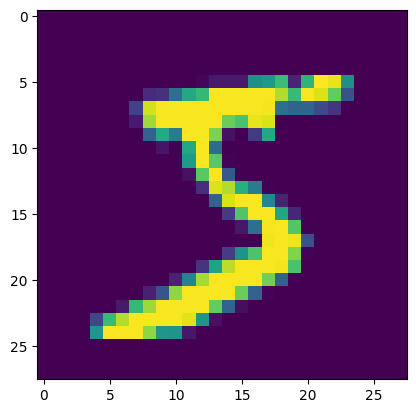

In [13]:
plt.imshow(list(chunks(lst1,28)))

In [14]:
val_iter = chunks(vals,5)
next(val_iter) #next mean yield the next thing

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [15]:
next(val_iter)

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [16]:
list(chunks(vals,5)) # two  lists of five elements

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

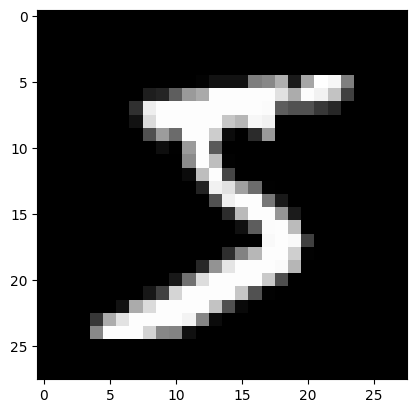

In [17]:
mpl.rcParams['image.cmap'] = 'gray'

plt.imshow(list(chunks(lst1, 28)))

In [18]:
from itertools import islice

In [19]:
it = iter(vals)
next(it),next(it),next(it),next(it),next(it),next(it)

(0.0, 0.0, 0.0, 0.19140625, 0.9296875, 0.98828125)

In [20]:
it = iter(vals)
isit = islice(it,5) # split it into 5, 6 would be error


In [21]:
next(isit),next(isit),next(isit),next(isit),next(isit)

(0.0, 0.0, 0.0, 0.19140625, 0.9296875)

In [22]:
# next(isit)

In [23]:
it = iter(vals)
isit = islice(it,5) # split it into 5, 6 would be error
list(isit)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [24]:
it = iter(lst1)
# functuions are calable
img = list(iter(lambda: list(islice(it, 28)), [] ))    # call lamda untill it returns "[]"

# here [] is sentinel mean it will call lambda/callable untill [] is return
# untill it returns the sentinel

In [25]:
alpha = [1,2,3,4,5]
a = iter(alpha)
next(a),next(a),next(a),next(a),

(1, 2, 3, 4)

### Matrix & tensor

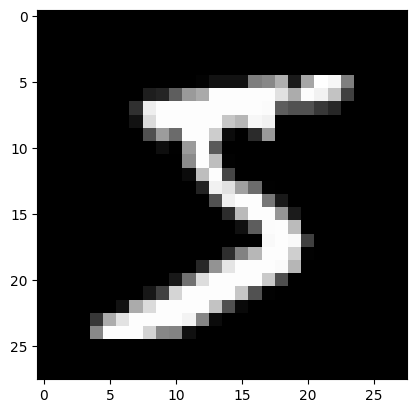

In [26]:
it = iter(lst1)
img = list(iter(
    lambda: list(islice(it,28)),
    []
))

plt.imshow(img)

In [27]:
## noew img is list of lists(images)

In [28]:
img[20]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.09375,
 0.4453125,
 0.86328125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.78515625,
 0.3046875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [29]:
img[20][12]

0.86328125

In [30]:
# to write it in m[20,5] form rather than m[20][5]
class Matrix:
  def __init__(self, xs): self.xs =xs

  def __getitem__(self, idxs): return self.xs[idxs[0]][ idxs[1]]



In [31]:
m = Matrix(img)
m[20,15]

0.98828125

In [32]:
import torch
from torch import tensor

In [33]:
tensor([1,2,3], dtype = torch.float64)

tensor([1., 2., 3.], dtype=torch.float64)

In [34]:
tens = tensor(
    [
        [1,2,3],
        [3,4,5]
    ]
)

tens

tensor([[1, 2, 3],
        [3, 4, 5]])

In [35]:
tens = tensor(img)

tens[20,15]

tensor(0.9883)

In [36]:
x_train, y_train, x_valid, y_valid = map( tensor, (x_train, y_train, x_valid, y_valid))

x_train.shape , y_train.shape, x_valid.shape, y_valid.shape

(torch.Size([50000, 784]),
 torch.Size([50000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [37]:
x_train.type()

'torch.FloatTensor'

In [38]:
imgs = x_train.reshape(-1, 28,28)  # -1 will make pytorch figure out 50000 automatiaclly

imgs.shape # rank3 tensor

torch.Size([50000, 28, 28])

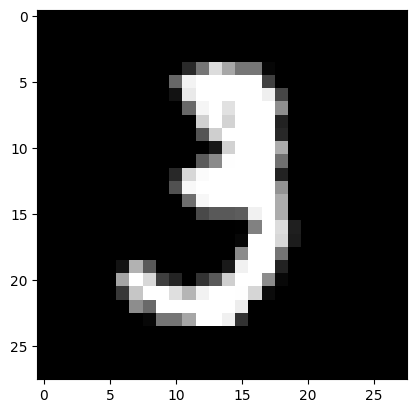

In [39]:
plt.imshow(imgs[10])

In [40]:
imgs[0,12,14]

tensor(0.2734)

In [41]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [42]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

In [43]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

## Random Number genreator


In [44]:
# for random nnumbers no correlation and uniform distribution

In [45]:
# rand_state =None
# def seed(a):
#   global rnd_state

#   x,y,z - rand_state
#   x=

In [46]:
l = [0,1,2,3,4,5,6,7,8,9]


def c(x, sz):
  for i in range(0, len(x),sz):
    yield x[i:i+sz]

list(c(l, 1))

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]

## matrix multiplication

In [47]:
torch.manual_seed(1)
weights =  torch.randn(784,10)
bias = torch.zeros(10)

In [48]:
m1 = x_valid[:5]
m2 = weights

In [49]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [50]:
ar,ac = m1.shape
br,bc = m2.shape

(ar,ac),(br,bc)

((5, 784), (784, 10))

In [51]:
t1 = torch.zeros(ar,bc) # resultant would be
t1.shape

torch.Size([5, 10])

In [52]:
# for i in range(ar): #5
#   for j in range(bc): #10
#     for k in range(ac): #784
#       t1[i,j] += m1[i,k] * m2[k,j]
#       # print(f'{i} , {j}, {k}')


In [53]:
t1

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [54]:
t1 = m1@ m2
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [55]:
torch.set_printoptions(precision=1,
                       linewidth=140,
                       sci_mode=False)
t1

tensor([[-10.9,  -0.7,  -7.0,  -4.0,  -2.1,  -3.4,   3.9,  -3.4, -11.5,  -2.1],
        [ 14.5,   6.0,   2.9,  -4.1,   6.6, -14.7,  -9.3,   2.2, -15.3,  -2.7],
        [  2.2,  -3.2,  -4.8,  -6.0,  14.2,  -9.0,  -4.8,  -5.4, -20.7,  13.6],
        [ -6.7,   8.9,  -7.5,  -7.9,   2.7,  -4.7, -11.0, -13.0,  -6.4,   3.6],
        [ -2.4,  -6.4,  -2.4,  -9.0,  11.2,  -5.8,  -8.9,  -3.8,  -9.0,   5.3]])

In [56]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)
t1

tensor([[-10.9,  -0.7,  -7.0,  -4.0,  -2.1,  -3.4,   3.9,  -3.4, -11.5,  -2.1],
        [ 14.5,   6.0,   2.9,  -4.1,   6.6, -14.7,  -9.3,   2.2, -15.3,  -2.7],
        [  2.2,  -3.2,  -4.8,  -6.0,  14.2,  -9.0,  -4.8,  -5.4, -20.7,  13.6],
        [ -6.7,   8.9,  -7.5,  -7.9,   2.7,  -4.7, -11.0, -13.0,  -6.4,   3.6],
        [ -2.4,  -6.4,  -2.4,  -9.0,  11.2,  -5.8,  -8.9,  -3.8,  -9.0,   5.3]])

In [57]:
# def matmul(a,b):
#   (ar,ac) ,(br,bc) = a.shape, b.shape
#   c=torch.zeros(ar, bc)
#   for i in range(ar):
#     for j in range(bc):
#       for k in range(ac):
#         c[i,j] += a[i,k]*b[k,j]
#   return c


# matmul(m1,m2)

In [58]:
# %time _=matmul(m1,m2)

In [59]:
def triLoopMultiplication(a,b):
  (ar,ac) ,(br,bc) = a.shape, b.shape
  c = torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc):
      for k in range(ac):
        c[i,j] += a[i,k]*b[k,j]
  return c


%time _=triLoopMultiplication(m1,m2)

CPU times: user 1.31 s, sys: 38.7 ms, total: 1.35 s
Wall time: 2.89 s


In [60]:
ar*bc*ac

39200

In [61]:
%time _=m1@m2

CPU times: user 512 µs, sys: 0 ns, total: 512 µs
Wall time: 1.56 ms


In [62]:
# so python is slow

## Numba  
  just-in-time compiler
  takes python and turns it to basic machine code


In [63]:
# !pip install numba
from numba import njit

In [64]:
@njit
def dot(a,b):
  res=0
  for i in range(len(a)):
    res+=a[i]*b[i]
  return res


In [65]:
a= [0,1,2,3,4]
b=[0,1,2,3,4]

In [66]:
%time _= dot(a,b)

/usr/local/lib/python3.10/dist-packages/numba/core/ir_utils.py:2172: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'a' of function 'dot'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-64-6f0283a0bb89>", line 2:
@njit
def dot(a,b):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/usr/local/lib/python3.10/dist-packages/numba/core/ir_utils.py:2172: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'b' of function 'dot'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-64-6f0283a0bb89>", line 2:
@njit
def dot(a,b):
^

  warnings.warn(NumbaPendingDeprecationWarning

CPU times: user 833 ms, sys: 77.6 ms, total: 911 ms
Wall time: 2.5 s


In [67]:
# only two loops
def matmul(a,b):
  # a,b = np.array(a) , np.array(b)
  (ar,ac) ,(br,bc) = a.shape, b.shape
  c=torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc):
        c[i,j] = dot(a[i,:], b[:,j])
  return c

m1a, m2a = m1.numpy(), m2.numpy()
matmul(m1a,m2a)

tensor([[-10.9,  -0.7,  -7.0,  -4.0,  -2.1,  -3.4,   3.9,  -3.4, -11.5,  -2.1],
        [ 14.5,   6.0,   2.9,  -4.1,   6.6, -14.7,  -9.3,   2.2, -15.3,  -2.7],
        [  2.2,  -3.2,  -4.8,  -6.0,  14.2,  -9.0,  -4.8,  -5.4, -20.7,  13.6],
        [ -6.7,   8.9,  -7.5,  -7.9,   2.7,  -4.7, -11.0, -13.0,  -6.4,   3.6],
        [ -2.4,  -6.4,  -2.4,  -9.0,  11.2,  -5.8,  -8.9,  -3.8,  -9.0,   5.3]])

In [68]:
# !pip install fastcore
from fastcore.test import *

In [69]:
test_close(t1, matmul(m1a, m2a))

In [70]:
%timeit -n 50 matmul(m1a, m2a)

1.67 ms ± 698 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [71]:
a = torch.tensor([ 2, 2, 2],
                 dtype = torch.int32)
b = torch.tensor([ 4, 4 , 1])
a+b

tensor([6, 6, 3])

In [72]:
( a < b ).float().mean()

tensor(0.7)

In [73]:
m = tensor(
    [
      [1,2,3],
      [4,5,6],
      [7,8,9]
    ]
)
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

#### Forbenius norm:
  sum of square over each rows and columns of matrix and then sqrt

In [74]:
sf = (m*m).sum()
sf

tensor(285)

In [75]:
sf.sqrt()

tensor(16.9)

In [76]:
m[2,:] , m[:,2]

(tensor([7, 8, 9]), tensor([3, 6, 9]))

In [77]:
m[2]

tensor([7, 8, 9])

In [78]:
# only two loops
def matmul(a,b):
  # a,b = np.array(a) , np.array(b)
  (ar,ac) ,(br,bc) = a.shape, b.shape
  c=torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc):
            c[i, j] = torch.tensor((a[i, :] * b[:, j]).sum())
  return c

m1a, m2a = m1.numpy(), m2.numpy()
matmul(m1a,m2a)

tensor([[-10.9,  -0.7,  -7.0,  -4.0,  -2.1,  -3.4,   3.9,  -3.4, -11.5,  -2.1],
        [ 14.5,   6.0,   2.9,  -4.1,   6.6, -14.7,  -9.3,   2.2, -15.3,  -2.7],
        [  2.2,  -3.2,  -4.8,  -6.0,  14.2,  -9.0,  -4.8,  -5.4, -20.7,  13.6],
        [ -6.7,   8.9,  -7.5,  -7.9,   2.7,  -4.7, -11.0, -13.0,  -6.4,   3.6],
        [ -2.4,  -6.4,  -2.4,  -9.0,  11.2,  -5.8,  -8.9,  -3.8,  -9.0,   5.3]])

In [79]:
# # only two loops
# def matmul(a,b):
#   # a,b = np.array(a) , np.array(b)
#   (ar,ac) ,(br,bc) = a.shape, b.shape
#   c=torch.zeros(ar, bc)
#   for i in range(ar):
#     for j in range(bc):
#             c[i, j] = torch.dot(a[i, :], b[:, j])
#   return c

# matmul(m1,m2)

In [80]:
# Using dot product to reduce a loop
def biLoopMultiplication(a,b):
  (ar,ac) ,(br,bc) = a.shape, b.shape
  c=torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc):
            c[i, j] = torch.dot(a[i, :], b[:, j])
  return c

%time _= biLoopMultiplication(m1, m2)

CPU times: user 1.89 ms, sys: 162 µs, total: 2.05 ms
Wall time: 4.32 ms


### Broadcasting

 how arrays with diffeent shapes are treated during arithmetic operations!

In [81]:
a=torch.tensor([1,2,3])
a>2

tensor([False, False,  True])

In [82]:
a[a<2]

tensor([1])

In [83]:
2*a+1

tensor([3, 5, 7])

In [84]:
# we can slo broadcast vector across metrtices

c=torch.tensor([10,20,30]);c

tensor([10, 20, 30])

In [85]:
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [86]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [87]:
m+c

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [88]:
c+m

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [89]:
t = c.expand_as(m)
t


tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]])

In [90]:
t.storage() #  # here it does not create 3 copies... t.storage sho

<ipython-input-90-6087dc2ace11>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  t.storage() #  # here it does not create 3 copies... t.storage sho


 10
 20
 30
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [91]:
m + t

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [92]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [93]:
 c, c.shape, c.unsqueeze(0), c.unsqueeze(0).shape

(tensor([10, 20, 30]),
 torch.Size([3]),
 tensor([[10, 20, 30]]),
 torch.Size([1, 3]))

In [94]:
 c, c.shape, c[None, :], c[None, :].shape  # None adds new axis here

(tensor([10, 20, 30]),
 torch.Size([3]),
 tensor([[10, 20, 30]]),
 torch.Size([1, 3]))

In [95]:
 c, c.shape, c.unsqueeze(1), c.unsqueeze(1).shape, c[:, None], c[:, None].shape

(tensor([10, 20, 30]),
 torch.Size([3]),
 tensor([[10],
         [20],
         [30]]),
 torch.Size([3, 1]),
 tensor([[10],
         [20],
         [30]]),
 torch.Size([3, 1]))

In [96]:
c[None].shape # row matrix bcz ,: is optional     #trailing column is optional

torch.Size([1, 3])

In [97]:
c[..., None].shape  #In summary, c[..., None] adds a new dimension of size 1 to the end of the original tensor's shape.

torch.Size([3, 1])

In [98]:
c

tensor([10, 20, 30])

In [99]:
c.expand_as(m) , c[:,None].expand_as(m)

(tensor([[10, 20, 30],
         [10, 20, 30],
         [10, 20, 30]]),
 tensor([[10, 10, 10],
         [20, 20, 20],
         [30, 30, 30]]))

In [100]:
c.shape, c, c[:,None], c[:,None].shape , m.shape     # c[:,None] is column so it witll be spred across | c across cols

(torch.Size([3]),
 tensor([10, 20, 30]),
 tensor([[10],
         [20],
         [30]]),
 torch.Size([3, 1]),
 torch.Size([3, 3]))

In [101]:
m + c[:, None] # same as m+  c[:,None].expand_as(m)  ,  c.expand_as(m) is done autimatically

tensor([[11, 12, 13],
        [24, 25, 26],
        [37, 38, 39]])

In [102]:
m + c,  m + c[None,:]

(tensor([[11, 22, 33],
         [14, 25, 36],
         [17, 28, 39]]),
 tensor([[11, 22, 33],
         [14, 25, 36],
         [17, 28, 39]]))

In [103]:
m + c[:, None], m + c[None,:]

(tensor([[11, 12, 13],
         [24, 25, 26],
         [37, 38, 39]]),
 tensor([[11, 22, 33],
         [14, 25, 36],
         [17, 28, 39]]))

In [104]:
c[None, :] , c[:,None]

(tensor([[10, 20, 30]]),
 tensor([[10],
         [20],
         [30]]))

In [105]:
c[None, :] * c[:,None] # or c[None] * c[:,None]

tensor([[100, 200, 300],
        [200, 400, 600],
        [300, 600, 900]])

In [106]:
c[None, :] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [107]:
# when operating on two tensors, np/pytorch compares their shapes elementwise. It starts with the trailing dimensionss and works its way forward. Two dims are compatible when -
# - tthey are equal
# -one of them is 1, in which case dimension is broadcasted to make it same size


# for broadcstng one of dim need to be 1


# for image (3d)   256*256*3
# scalar (1d)     1*1*3        # 1*1* is assumption

# result (3d)   256*256*3


In [108]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [109]:
digit[:,None].shape

torch.Size([784, 1])

In [110]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [111]:
(digit[:,None]*m2).shape

torch.Size([784, 10])

In [112]:
# only two loops
def matmul(a,b):
  # a,b = np.array(a) , np.array(b)
  (ar,ac) ,(br,bc) = a.shape, b.shape
  c=torch.zeros(ar, bc)
  for i in range(ar):
    # for j in range(bc):
            # c[i, j] = torch.dot(a[i, :], b[:, j])
    c[i] = (a[i, :, None]*b).sum(dim=0)   # ith row

  return c

matmul(m1,m2)
print(m1.shape, "\t", m2.shape)

torch.Size([5, 784]) 	 torch.Size([784, 10])


In [113]:
digit[...][None].shape, digit.shape

(torch.Size([1, 784]), torch.Size([784]))

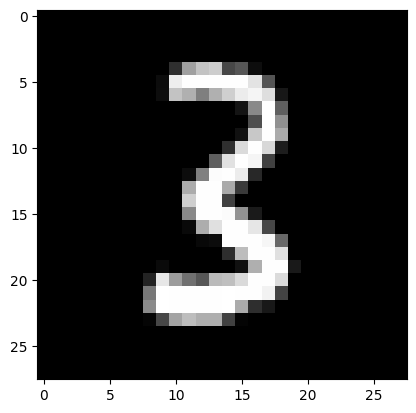

In [114]:
plt.imshow(torch.reshape(digit,(28,28)))


In [115]:
m,c

x=torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]

])
b=tensor([1,2,3])
bs  = tensor([[[1,2,3],[5,6,1]]])
x,b.expand_as(x)

# x,bs, bs.expand_as(x)

bs*b


tensor([[[ 1,  4,  9],
         [ 5, 12,  3]]])

In [116]:
tr = matmul(x_train, weights)
tr


tensor([[  1.0,  -3.0,  -2.1,  ..., -15.1, -17.7,   0.6],
        [  6.9,  -0.3,   0.8,  ..., -17.1, -25.4,  16.2],
        [-10.2,   7.4,   4.1,  ...,  -6.7,  -6.8,  -1.6],
        ...,
        [  7.4,   7.6,  -3.5,  ...,  -1.0, -16.2,   2.1],
        [  3.2,   9.5,  -9.4,  ...,   3.0, -19.6,  -2.0],
        [ 15.7,   4.1,  -5.6,  ...,   8.1, -12.2,   0.4]])

In [117]:
def uniLoopMultiplication(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        c[i] = (a[i,:,None] * b).sum(dim=0) # broadcast version
    return c

%time _= uniLoopMultiplication(m1, m2)

CPU times: user 419 µs, sys: 0 ns, total: 419 µs
Wall time: 617 µs


#### Einstein Summation(einsum)
  is a compact representaion for combinng products and sums in a general way.

  Key rules are:
  - repeating letters between input arrays means that values along those axes with be multiplied together,
  - Omitting a letter from the output means that values along that axis wil be summed.

In [118]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [119]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
mr = torch.einsum('ik,kj -> ikj', m1,m2)   #here ikj, k is multiplied!    #now to omit any letter from ikj, just sum it
m1.shape, m2.shape, mr.shape

(torch.Size([5, 784]), torch.Size([784, 10]), torch.Size([5, 784, 10]))

In [120]:
mr.sum(1), mr.sum(1).shape  # ikj => ij  # sum on that dimension will eliminate that dim #

(tensor([[-10.9,  -0.7,  -7.0,  -4.0,  -2.1,  -3.4,   3.9,  -3.4, -11.5,  -2.1],
         [ 14.5,   6.0,   2.9,  -4.1,   6.6, -14.7,  -9.3,   2.2, -15.3,  -2.7],
         [  2.2,  -3.2,  -4.8,  -6.0,  14.2,  -9.0,  -4.8,  -5.4, -20.7,  13.6],
         [ -6.7,   8.9,  -7.5,  -7.9,   2.7,  -4.7, -11.0, -13.0,  -6.4,   3.6],
         [ -2.4,  -6.4,  -2.4,  -9.0,  11.2,  -5.8,  -8.9,  -3.8,  -9.0,   5.3]]),
 torch.Size([5, 10]))

In [121]:

mr = torch.einsum('ij,jk -> ijk', m1,m2)   #here ijk, j is multiplied!
m1.shape, m2.shape, mr.shape

(torch.Size([5, 784]), torch.Size([784, 10]), torch.Size([5, 784, 10]))

In [122]:
mr.sum(1), mr.sum(1).shape  # ikj => ij  # sum on that dimension will eliminate that dim

(tensor([[-10.9,  -0.7,  -7.0,  -4.0,  -2.1,  -3.4,   3.9,  -3.4, -11.5,  -2.1],
         [ 14.5,   6.0,   2.9,  -4.1,   6.6, -14.7,  -9.3,   2.2, -15.3,  -2.7],
         [  2.2,  -3.2,  -4.8,  -6.0,  14.2,  -9.0,  -4.8,  -5.4, -20.7,  13.6],
         [ -6.7,   8.9,  -7.5,  -7.9,   2.7,  -4.7, -11.0, -13.0,  -6.4,   3.6],
         [ -2.4,  -6.4,  -2.4,  -9.0,  11.2,  -5.8,  -8.9,  -3.8,  -9.0,   5.3]]),
 torch.Size([5, 10]))

In [123]:
mr = torch.einsum('ik,kj -> ij', m1,m2)
mr,mr.shape

(tensor([[-10.9,  -0.7,  -7.0,  -4.0,  -2.1,  -3.4,   3.9,  -3.4, -11.5,  -2.1],
         [ 14.5,   6.0,   2.9,  -4.1,   6.6, -14.7,  -9.3,   2.2, -15.3,  -2.7],
         [  2.2,  -3.2,  -4.8,  -6.0,  14.2,  -9.0,  -4.8,  -5.4, -20.7,  13.6],
         [ -6.7,   8.9,  -7.5,  -7.9,   2.7,  -4.7, -11.0, -13.0,  -6.4,   3.6],
         [ -2.4,  -6.4,  -2.4,  -9.0,  11.2,  -5.8,  -8.9,  -3.8,  -9.0,   5.3]]),
 torch.Size([5, 10]))

In [124]:
   torch.einsum('ik,kj -> ', m1,m2)

tensor(-152.4)

In [125]:
def matmul(a,b):
  return torch.einsum('ij,jk->ik',a,b)

matmul(m1,m2)

tensor([[-10.9,  -0.7,  -7.0,  -4.0,  -2.1,  -3.4,   3.9,  -3.4, -11.5,  -2.1],
        [ 14.5,   6.0,   2.9,  -4.1,   6.6, -14.7,  -9.3,   2.2, -15.3,  -2.7],
        [  2.2,  -3.2,  -4.8,  -6.0,  14.2,  -9.0,  -4.8,  -5.4, -20.7,  13.6],
        [ -6.7,   8.9,  -7.5,  -7.9,   2.7,  -4.7, -11.0, -13.0,  -6.4,   3.6],
        [ -2.4,  -6.4,  -2.4,  -9.0,  11.2,  -5.8,  -8.9,  -3.8,  -9.0,   5.3]])

In [126]:
test_close(tr, matmul(x_train, weights ), eps=1e-3)

In [127]:
def einSum(a,b):
  return torch.einsum('ij,jk->ik',a,b)


%time _= einSum(m1, m2)

CPU times: user 221 µs, sys: 0 ns, total: 221 µs
Wall time: 229 µs


but we dont need to all that bcz pytorch does that for us using @

In [128]:
# pytorch op @ or torch.matmul

In [129]:
test_close(tr,x_train@weights,eps=1e-3)

In [130]:
%timeit -n 5 _=torch.matmul(x_train, weights)

26.9 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [131]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

#### Using CUDA

In [132]:
# parallel

" writing code for filling just 0,0"

def matmul(grid , a,b,c):
  i,j = grid
  if(i<c.shape[0] and j<c.shape[1]):
    tmp=0
    for k in range(a.shape[1]): tmp+=a[i,k]*b[k,j]

    c[i][j] = tmp




res = torch.zeros(ar,bc)
matmul((0,0),m1,m2,res)
matmul((0,1),m1,m2,res)
matmul((1,1),m1,m2,res)
matmul((0,2),m1,m2,res)
res  # we can do all this parallel


tensor([[-10.9,  -0.7,  -7.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0],
        [  0.0,   6.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0],
        [  0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0],
        [  0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0],
        [  0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0]])

In [133]:
def launch_kernel(kernel, grid_x, grid_y, *args,**kwargs):
  for i in range(grid_x):
    for j in range(grid_y):
      kernel((i,j),*args,**kwargs)

In [134]:
res = torch.zeros(ar,bc)
launch_kernel(matmul, ar,bc, m1,m2, res)
res

tensor([[-10.9,  -0.7,  -7.0,  -4.0,  -2.1,  -3.4,   3.9,  -3.4, -11.5,  -2.1],
        [ 14.5,   6.0,   2.9,  -4.1,   6.6, -14.7,  -9.3,   2.2, -15.3,  -2.7],
        [  2.2,  -3.2,  -4.8,  -6.0,  14.2,  -9.0,  -4.8,  -5.4, -20.7,  13.6],
        [ -6.7,   8.9,  -7.5,  -7.9,   2.7,  -4.7, -11.0, -13.0,  -6.4,   3.6],
        [ -2.4,  -6.4,  -2.4,  -9.0,  11.2,  -5.8,  -8.9,  -3.8,  -9.0,   5.3]])

In [135]:
from numba import cuda


@cuda.jit
def matmul(a,b,c):
  i,j = cuda.grid(2)  # 2 mean dims of grid
  if(i<c.shape[0] and j<c.shape[1]):
    tmp=0
    for k in range(a.shape[1]): tmp+=a[i,k]*b[k,j]

    c[i][j] = tmp


In [136]:
# r = np.zeros(tr.shape)
# #m1g,m2g,rg = cuda.to_device(x_train), cuda.to_device(weights), cuda.to_device(r)

# m1g,m2g,rg = map(cuda.to_device, (x_train,weights,r))

In [137]:
# r.shape

In [138]:
# TPB = 16
# rr,rc = r.shape
# blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))
# blockspergrid

In [139]:
# matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)  #[blockspergrid, (TPB,TPB)]
# r = rg.copy_to_host() # copying to host
# test_close(tr, r, eps=1e-3)

In [140]:
# m1c,m2c = x_train.cuda(),weights.cuda()   # .cuda() directly copies to gpu

In [141]:
# r=(m1c@m2c).cpu()  # willm copy to host after processing

In [142]:
# %timeit -n 10 r=(m1c@m2c).cpu()


# Mean Shift to practice above

## Clustering
  grouping data into clusters

In [143]:
import math, matplotlib.pyplot as plt, operator, torch
from functools import partial


torch.manual_seed(42)
torch.set_printoptions(precision=3, linewidth=140, sci_mode=False)

In [144]:
n_clusters, n_samples = 6,250

TO GENERATE OUR DATA, we are going to pick 6 random pointd, which we'll call cetroids and for each epoint we are going to generate 250 random oin=ints about it

In [145]:
centroids =  torch.rand(n_clusters,2)*70-35   # ,2 mean x and y coords for each point then we are going to randomly generate data around those six centroids

In [146]:
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

In [147]:
def sample(m):
  return MultivariateNormal(m, torch.diag(tensor([5.,5.]))).sample((n_samples,))

# m: mean
# torch.diag(tensor([5.,5.])) mean covariance matrix to refecct relation between columns
# sample((n_samples,)) : of samples

In [148]:
slices = [ sample(c) for c in centroids]
data= torch.cat(slices)
data.shape

torch.Size([1500, 2])

In [149]:
# [sample(c) for c in centroids][1]

In [150]:

def plot_data(centroids, data, n_samples, ax=None):
    if ax is None: _,ax = plt.subplots()
    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        ax.scatter(samples[:,0], samples[:,1], s=1)
        ax.plot(*centroid, markersize=10, marker="x", color='k', mew=5)
        ax.plot(*centroid, markersize=5, marker="x", color='m', mew=2)

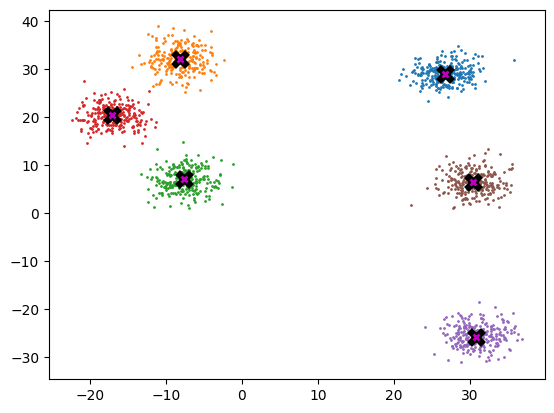

In [151]:
plot_data(centroids, data, n_samples)

##Mean shift
Most people that have come across clustering algorithms have learnt about k-means. Mean shift clustering is a newer and less well-known approach, but it has some important advantages:

* It doesn't require selecting the number of clusters in advance, but instead just requires a bandwidth to be specified, which can be easily chosen automatically
* It can handle clusters of any shape, whereas k-means (without using special extensions) requires that clusters be roughly ball shaped.

The algorithm is as follows:

* For each data point x in the sample X, find the distance between that point x and every other point in X
* Create weights for each point in X by using the Gaussian kernel of that point's distance to x
 * This weighting approach penalizes points further away from x
 * The rate at which the weights fall to zero is determined by the bandwidth, which is the standard deviation of the Gaussian
* Update x as the weighted average of all other points in X, weighted based on the previous step


This will iteratively push points that are close together even closer until they are next to each other.

In [152]:
data.shape

torch.Size([1500, 2])

In [153]:
midp = data.mean(0)
midp

tensor([ 9.222, 11.604])

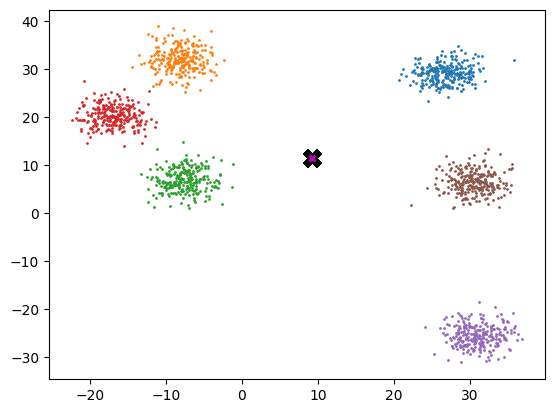

In [154]:
plot_data([midp]*6, data, n_samples)

So here's the definition of the gaussian kernel, which you may remember from high school... This person at the science march certainly remembered!

In [155]:
def gaussian(d, bw): return torch.exp(-0.5*((d/bw))**2) / (bw*math.sqrt(2*math.pi))


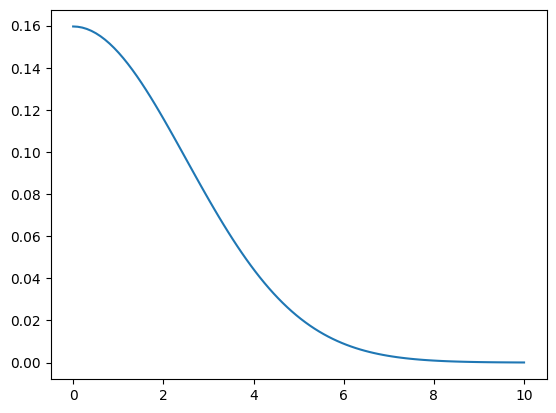

In [156]:
def plot_func(f):
    x = torch.linspace(0,10,100)
    plt.plot(x, f(x))

plot_func(partial(gaussian, bw=2.5))


In [157]:
partial

functools.partial

In [158]:
f = partial(gaussian, bw=2.5)

In [159]:
f(tensor(4.))  # same as graph above

tensor(0.044)

In our implementation, we choose the bandwidth to be 2.5.

One easy way to choose bandwidth is to find which bandwidth covers one third of the data.

In [160]:
def tri(d,i):
  return  (-d+i).clamp_min(0)/i  # triangular weighting with clamp_min

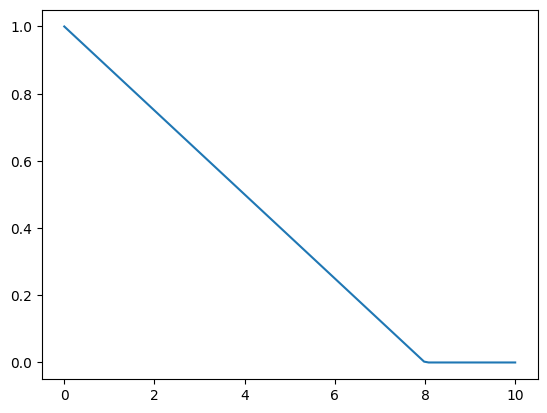

In [161]:
plot_func(partial(tri, i=8))

In [162]:
# so we can use this but initially we will be using clamp_moin version

In [163]:
X = data.clone()
x = data[0]
x


tensor([26.204, 26.349])

In [164]:
x.shape, X.shape, x[None].shape,x[:,None].shape

(torch.Size([2]),
 torch.Size([1500, 2]),
 torch.Size([1, 2]),
 torch.Size([2, 1]))

In [165]:
(x[None] -X)[:4] , (x -X)[:4]

(tensor([[ 0.000,  0.000],
         [ 0.513, -3.865],
         [-4.227, -2.345],
         [ 0.557, -3.685]]),
 tensor([[ 0.000,  0.000],
         [ 0.513, -3.865],
         [-4.227, -2.345],
         [ 0.557, -3.685]]))

In [166]:
x, X[0]

(tensor([26.204, 26.349]), tensor([26.204, 26.349]))

##### trick : If you have two shapes of different length, we can use shorter length and it will add unit axis to the front making it as long as necessary to make it compatible with longer shape.. it's actually doing broascastin and replicating (x[None] -X)[:4] , (x -X)[:4]

In [167]:
(x[None] -X).shape , (x -X).shape

(torch.Size([1500, 2]), torch.Size([1500, 2]))

In [168]:
dist = ((x-X)**2).sum(1).sqrt() # torch.einsum("ij->i",((x-X)**2)).sqrt()
dist[:8], dist.shape

(tensor([0.000, 3.899, 4.834, 3.726, 6.273, 4.122, 6.560, 6.002]),
 torch.Size([1500]))

according to pythogarious

c^2 = a^2 + b^2   => c = ( Δa^2 + Δb^2) ^(1/2)

but what if we just:
* first cover Δx then Δy and simply add this distance it would be same as above equation so that eq would be: c = ( Δa + Δb) ^(1/1) ~ Δa + Δb  which is just sum.


so Norm is: if we got list of numbers we can add them each for power of `alpha` and take `1/alpha` of whole sum, that would be whole norm.


*   (Σ(v^α))^(1/α)  where as v is list of numbers.. this is general equation of norm


In [169]:
#einsum
torch.einsum("ij->i",((x-X)**2)).sqrt()[:8]

tensor([0.000, 3.899, 4.834, 3.726, 6.273, 4.122, 6.560, 6.002])

In [170]:
weight  = gaussian(dist, 2.5)
weight.shape, weight

(torch.Size([1500]),
 tensor([    0.160,     0.047,     0.025,  ...,     0.000,     0.000,     0.000]))

Now we want weighted avg of with  weight

We need to mutip[y every axis of `X` with `weight`

In [171]:
weight.shape, X.shape, weight[None].shape, weight[:,None].shape

(torch.Size([1500]),
 torch.Size([1500, 2]),
 torch.Size([1, 1500]),
 torch.Size([1500, 1]))

In [172]:
weight[None].shape, weight[:,None].shape

(torch.Size([1, 1500]), torch.Size([1500, 1]))

In [173]:
(X * weight[:,None] ).shape # because we want to multiuply `weight` with each column of X, so [:,None] format

torch.Size([1500, 2])

In [174]:
# (X * weight ).shape  # wont work because things are compatible if  they are equal or one of them is 1

#### Compatibility in matrix multiplication if :
* they are equal
* one of them is 1

In [175]:
def one_update(X):
  for i,x in enumerate(X):
    dist = torch.sqrt(((x-X)**2).sum(1))
    weight = gaussian(dist, 2.5)
    #weight= tri(dist,8)
    X[i] = (weight[:,None]*X).sum(0)/weight.sum()


In [176]:
def meanshift(data):
  X=data.clone()
  for it in range(5): one_update(X)  # do update on data
  return X


In [177]:
%time X=meanshift(data)

CPU times: user 1.38 s, sys: 2.38 ms, total: 1.38 s
Wall time: 1.38 s


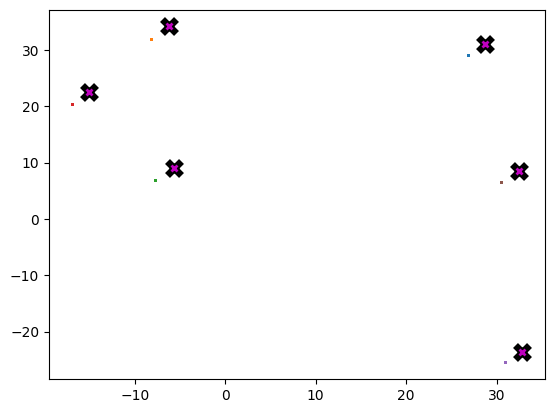

In [178]:
plot_data(centroids+2, X, n_samples)

In [179]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def do_one(d):
    if d: one_update(X)
    ax.clear()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")

    plot_data(centroids+2, X, n_samples, ax=ax)

# create your own animation
X = data.clone()
fig,ax = plt.subplots()
ani = FuncAnimation(fig, do_one, frames=5, interval=500, repeat=False)
ani.save("animation.html", writer="html")

plt.close()
HTML(ani.to_jshtml())

 but its SLOW.becaue loop wont run on GPU even though we will move data to GPU
 sO WE ARE GOING TO REPLACE LOOP WITH BROADCASTING


 ### GPU batched algorithm

 make one_update() run without loop

In [180]:
# create mini batches
bs = 5 # 5 items at a time
X = data.clone()
x = X[:bs]
x.shape, X.shape

(torch.Size([5, 2]), torch.Size([1500, 2]))

In [181]:
"""
Noew instead of using single instance, we are using batch i.e. x = X[:bs] (5,2) so we'd be calculating distance between each instance of X (1500,2) with each instance
of X, so resultant wold be would be a distance matrix (5,1500)

"""

"\nNoew instead of using single instance, we are using batch i.e. x = X[:bs] (5,2) so we'd be calculating distance between each instance of X (1500,2) with each instance\nof X, so resultant wold be would be a distance matrix (5,1500)\n\n"

In [182]:
def dist_b(a,b):
  print(f"A: {a.shape}  , B: {b.shape}")

  print(f"A[None]: {a[None].shape}  , \n A: {a[None][:4]}\n\n\n\n")
  print(f"B[None]: {b[:,None].shape}  ,\n  B: {b[:,None][:4]}")
  # return(a[None] - b[:, None])


  # return torch.sqrt(((a[None] - b[:, None])**2))
  return torch.sqrt(((a[None] - b[:, None])**2).sum(2))
dist_b(X,x).shape
# dist_b(X,x)



A: torch.Size([1500, 2])  , B: torch.Size([5, 2])
A[None]: torch.Size([1, 1500, 2])  , 
 A: tensor([[[26.204, 26.349],
         [25.691, 30.213],
         [30.431, 28.693],
         ...,
         [30.772,  9.323],
         [29.354,  3.960],
         [31.168,  5.309]]])




B[None]: torch.Size([5, 1, 2])  ,
  B: tensor([[[26.204, 26.349]],

        [[25.691, 30.213]],

        [[30.431, 28.693]],

        [[25.647, 30.033]]])


torch.Size([5, 1500])

In [183]:
dist_b(X,x).shape, dist_b(X,x)


A: torch.Size([1500, 2])  , B: torch.Size([5, 2])
A[None]: torch.Size([1, 1500, 2])  , 
 A: tensor([[[26.204, 26.349],
         [25.691, 30.213],
         [30.431, 28.693],
         ...,
         [30.772,  9.323],
         [29.354,  3.960],
         [31.168,  5.309]]])




B[None]: torch.Size([5, 1, 2])  ,
  B: tensor([[[26.204, 26.349]],

        [[25.691, 30.213]],

        [[30.431, 28.693]],

        [[25.647, 30.033]]])
A: torch.Size([1500, 2])  , B: torch.Size([5, 2])
A[None]: torch.Size([1, 1500, 2])  , 
 A: tensor([[[26.204, 26.349],
         [25.691, 30.213],
         [30.431, 28.693],
         ...,
         [30.772,  9.323],
         [29.354,  3.960],
         [31.168,  5.309]]])




B[None]: torch.Size([5, 1, 2])  ,
  B: tensor([[[26.204, 26.349]],

        [[25.691, 30.213]],

        [[30.431, 28.693]],

        [[25.647, 30.033]]])


(torch.Size([5, 1500]),
 tensor([[ 0.000,  3.899,  4.834,  ..., 17.628, 22.610, 21.617],
         [ 3.899,  0.000,  4.978,  ..., 21.499, 26.508, 25.500],
         [ 4.834,  4.978,  0.000,  ..., 19.373, 24.757, 23.396],
         [ 3.726,  0.185,  4.969,  ..., 21.335, 26.336, 25.333],
         [ 6.273,  5.547,  1.615,  ..., 20.775, 26.201, 24.785]]))

In [184]:
X.shape, x.shape

(torch.Size([1500, 2]), torch.Size([5, 2]))

In [185]:
# X-x

In [186]:
x[None].shape, x[:, None].shape, (X[None,:]-x[:,None]).shape

(torch.Size([1, 5, 2]), torch.Size([5, 1, 2]), torch.Size([5, 1500, 2]))

In [187]:
dist_b(X,x).shape

A: torch.Size([1500, 2])  , B: torch.Size([5, 2])
A[None]: torch.Size([1, 1500, 2])  , 
 A: tensor([[[26.204, 26.349],
         [25.691, 30.213],
         [30.431, 28.693],
         ...,
         [30.772,  9.323],
         [29.354,  3.960],
         [31.168,  5.309]]])




B[None]: torch.Size([5, 1, 2])  ,
  B: tensor([[[26.204, 26.349]],

        [[25.691, 30.213]],

        [[30.431, 28.693]],

        [[25.647, 30.033]]])


torch.Size([5, 1500])

In [188]:
weight = gaussian(dist_b(X,x),2)
weight

A: torch.Size([1500, 2])  , B: torch.Size([5, 2])
A[None]: torch.Size([1, 1500, 2])  , 
 A: tensor([[[26.204, 26.349],
         [25.691, 30.213],
         [30.431, 28.693],
         ...,
         [30.772,  9.323],
         [29.354,  3.960],
         [31.168,  5.309]]])




B[None]: torch.Size([5, 1, 2])  ,
  B: tensor([[[26.204, 26.349]],

        [[25.691, 30.213]],

        [[30.431, 28.693]],

        [[25.647, 30.033]]])


tensor([[    0.199,     0.030,     0.011,  ...,     0.000,     0.000,     0.000],
        [    0.030,     0.199,     0.009,  ...,     0.000,     0.000,     0.000],
        [    0.011,     0.009,     0.199,  ...,     0.000,     0.000,     0.000],
        [    0.035,     0.199,     0.009,  ...,     0.000,     0.000,     0.000],
        [    0.001,     0.004,     0.144,  ...,     0.000,     0.000,     0.000]])

In [189]:
gaussian??

In [190]:
weight.shape, X.shape

(torch.Size([5, 1500]), torch.Size([1500, 2]))

In [191]:
weight[..., None].shape, weight[:,:, None].shape,X[None].shape

(torch.Size([5, 1500, 1]), torch.Size([5, 1500, 1]), torch.Size([1, 1500, 2]))

In [192]:
num = (weight[..., None] * X[None]).sum(1)
num.shape

torch.Size([5, 2])

In [193]:
num

tensor([[367.870, 386.231],
        [518.332, 588.680],
        [329.665, 330.782],
        [527.617, 598.217],
        [231.302, 234.155]])

In [194]:
torch.einsum('ij,jk -> ik', weight, X)

tensor([[367.870, 386.231],
        [518.332, 588.680],
        [329.665, 330.782],
        [527.617, 598.217],
        [231.302, 234.155]])

In [195]:
# same as
weight@X

tensor([[367.870, 386.231],
        [518.332, 588.680],
        [329.665, 330.782],
        [527.617, 598.217],
        [231.302, 234.155]])

In [196]:
weight.shape

torch.Size([5, 1500])

In [197]:
div = weight.sum(1, keepdim=True)
div.shape

torch.Size([5, 1])

In [198]:
num/div

tensor([[26.376, 27.692],
        [26.101, 29.643],
        [28.892, 28.990],
        [26.071, 29.559],
        [29.323, 29.685]])

In [199]:

def meanshift(data, bs=500):
    # n = len(data)
    n=1500
    X = data.clone()
    for it in range(5):
        for i in range(0, n, bs):
            s = slice(i, min(i+bs,n))   # n if whole data is elapsed
            weight = gaussian(dist_b(X, X[s]), 2.5)
#             weight = tri(dist_b(X, X[s]), 8)
            div = weight.sum(1, keepdim=True)
            X[s] = weight@X/div
    return X

"""Although each iteration still has to launch a new cuda kernel, there are now fewer iterations, and the acceleration from updating a batch of
     points more than makes up for it.

"""

'Although each iteration still has to launch a new cuda kernel, there are now fewer iterations, and the acceleration from updating a batch of\n     points more than makes up for it.\n\n'

In [200]:
data = data.cuda()

In [201]:
X=meanshift(data).cpu()

A: torch.Size([1500, 2])  , B: torch.Size([500, 2])
A[None]: torch.Size([1, 1500, 2])  , 
 A: tensor([[[26.204, 26.349],
         [25.691, 30.213],
         [30.431, 28.693],
         ...,
         [30.772,  9.323],
         [29.354,  3.960],
         [31.168,  5.309]]], device='cuda:0')




B[None]: torch.Size([500, 1, 2])  ,
  B: tensor([[[26.204, 26.349]],

        [[25.691, 30.213]],

        [[30.431, 28.693]],

        [[25.647, 30.033]]], device='cuda:0')
A: torch.Size([1500, 2])  , B: torch.Size([500, 2])
A[None]: torch.Size([1, 1500, 2])  , 
 A: tensor([[[26.440, 28.038],
         [26.239, 29.519],
         [28.484, 29.045],
         ...,
         [30.772,  9.323],
         [29.354,  3.960],
         [31.168,  5.309]]], device='cuda:0')




B[None]: torch.Size([500, 1, 2])  ,
  B: tensor([[[ -7.018,   6.885]],

        [[ -4.717,   3.665]],

        [[-10.471,   6.612]],

        [[-12.089,   9.137]]], device='cuda:0')
A: torch.Size([1500, 2])  , B: torch.Size([500, 2])
A[None

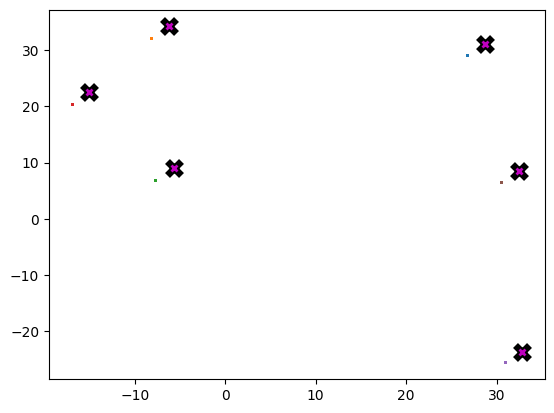

In [202]:
plot_data(centroids+2, X, n_samples)